In [3]:
from Clusters import data
f = "/sps/lsst/data/clusters/MACSJ2243.3-0935/analysis/output_v1/MACSJ2243.3-0935_filtered_data.hdf5"
d = data.read_data(f)
fc = d['forced']

KeyError: 'forced'

In [4]:
print d.keys()

['forced', 'meas']


In [12]:
print fc

base_CircularApertureFlux_70_0_flux ... coord_dec_deg 
                 ct                 ...      deg      
----------------------------------- ... --------------
                                nan ... -9.50417299504
                                nan ... -9.50631091083
                                nan ... -9.50631273401
                                nan ... -9.50632589495
                                nan ...  -9.5063327395
                                nan ...  -9.5062460577
                                nan ... -9.50629874096
                                nan ... -9.50635437897
                                nan ... -9.50600120865
                                nan ... -9.50549567214
                                ... ...            ...
                      1.50556364615 ... -9.73333093082
                      3.38628042737 ... -9.73388006895
                      34.7225751682 ...  -9.7302761071
                      34.9437715002 ... -9.73010079525
          

In [23]:
N = len(fc)
print N, "rows"

1050500 rows


In [93]:
filters = set(fc['filter'])
nf = len(filters)
print nf, "filters:", filters 

5 filters: set(['i', 'r', 'u', 'z', 'g'])


In [24]:
ns = N / nf
print ns, "sources"

210100 sources


In [31]:
print "%i columns" % len(fc.keys())
for k in sorted(fc.keys())[:10]:
    print k

195 columns
base_CircularApertureFlux_12_0_flag
base_CircularApertureFlux_12_0_flag_apertureTruncated
base_CircularApertureFlux_12_0_flux
base_CircularApertureFlux_12_0_fluxSigma
base_CircularApertureFlux_12_0_mag
base_CircularApertureFlux_12_0_magSigma
base_CircularApertureFlux_17_0_flag
base_CircularApertureFlux_17_0_flag_apertureTruncated
base_CircularApertureFlux_17_0_flux
base_CircularApertureFlux_17_0_fluxSigma


In [27]:
magi = fc['modelfit_CModel_mag'][fc['filter'] == 'i']
magr = fc['modelfit_CModel_mag'][fc['filter'] == 'r']

and plot them against each other

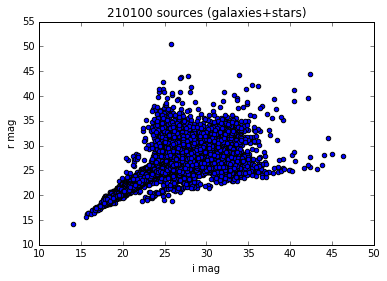

In [48]:
%matplotlib inline
import pylab
pylab.scatter(magi, magr)
pylab.xlabel('i mag')
pylab.ylabel('r mag')
pylab.title('%i sources (galaxies+stars)' % len(magi))

In [91]:
# ignore these lines
import warnings
#warnings.filterwarnings("ignore")
# ignore these lines

In [44]:
data_filtered = data.filter_table(d)
fc_filtered = data_filtered['forced']

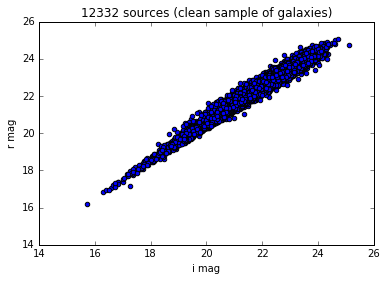

In [49]:
magi_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'i']
magr_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'r']
pylab.scatter(magi_filtered, magr_filtered)
pylab.xlabel('i mag')
pylab.ylabel('r mag')
pylab.title('%i sources (clean sample of galaxies)' % len(magi_filtered))

In [77]:
from astropy.table import Column

In [88]:
shifted_mags = fc_filtered['modelfit_CModel_mag'] + 2

In [89]:
fc_filtered.add_column(Column(name='shifted_mag', data=shifted_mags,
                              description='Shifted magnitude', unit='mag'))

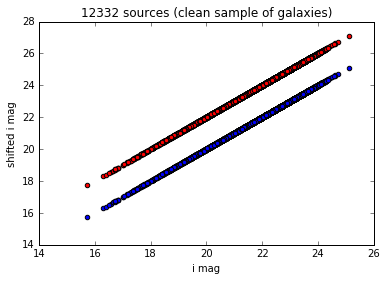

In [90]:
magi_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'i']
magi_shifted =  fc_filtered['shifted_mag'][fc_filtered['filter'] == 'i']
pylab.scatter(magi_filtered, magi_filtered)
pylab.scatter(magi_filtered, magi_shifted, c='r')
pylab.xlabel('i mag')
pylab.ylabel('shifted i mag')
pylab.title('%i sources (clean sample of galaxies)' % len(magi_filtered))